## **1. Mount google drive**
---

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

## **2. Import the necessary libraries**
---

In [61]:
import datetime
import matplotlib
import sklearn
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from keras.models import load_model

print("Versions of key libraries")
print("---")
print("tensorflow: ", tf.__version__)
print("numpy:      ", np.__version__)
print("matplotlib: ", matplotlib.__version__)
print("sklearn:    ", sklearn.__version__)

Versions of key libraries
---
tensorflow:  2.10.0
numpy:       1.21.5
matplotlib:  3.5.1
sklearn:     1.0.2


## **3.Create a function to plot image without axis**
---

In [62]:
def implt(img):
    plt.figure()
    plt.imshow(img)
    plt.axis('off')

print(implt)

x = datetime.datetime.now()
filename = x.strftime("%Y") + x.strftime("%m") + x.strftime("%d") + x.strftime("%H") + x.strftime("%M")

<function implt at 0x000001AB7C038430>


## **4. Set matplotlib to have seaborn plot style**
---

In [63]:
plt.style.use('seaborn')                   # if want to use the default style, set 'classic'
plt.rcParams['ytick.right']     = True
plt.rcParams['ytick.labelright']= True
plt.rcParams['ytick.left']      = False
plt.rcParams['ytick.labelleft'] = False
plt.rcParams['figure.figsize']  = [7,7]   # Set the figure size to be 7 inch for (width,height)

print("Matplotlib setup completes.")

Matplotlib setup completes.


## **5. Prepare Cifar10 data for training and testing**
---
* Step 1: Load the cifar10 
* Step 2: Check the shape and type of the data
* Step 3: Convert the data into float32 and rescale the values from the range of 0\~255 into 0\~1
* Step 4: Retrieve the row size and the column size of each image
* Step 5: Perform one-hot enconding on the labels
* Step 6: Retrieve the number of classes in this problem

In [64]:
                                                                                # Step 1
data            = cifar100.load_data(label_mode='coarse')
(trDat, trLbl)  = data[0]
(tsDat, tsLbl)  = data[1]

                                                                                # Step 2
print("The shape of trDat is", trDat.shape, "and the type of trDat is", trDat.dtype)
print("The shape of tsDat is", tsDat.shape, "and the type of tsDat is", tsDat.dtype)
print("")
print("The shape of trLbl is", trLbl.shape, "and the type of trLbl is", trLbl.dtype)
print("The shape of tsLbl is", tsLbl.shape, "and the type of tsLbl is", tsLbl.dtype)

                                                                                # Step 3
trDat           = trDat.astype('float32')/255
tsDat           = tsDat.astype('float32')/255

                                                                                # Step 4
imgrows         = trDat.shape[1]
imgclms         = trDat.shape[2]
channel         = trDat.shape[3]

                                                                                # Step 5
trLbl           = to_categorical(trLbl)
tsLbl           = to_categorical(tsLbl)
                               
num_classes     = tsLbl.shape[1]                                                # Step 6

The shape of trDat is (50000, 32, 32, 3) and the type of trDat is uint8
The shape of tsDat is (10000, 32, 32, 3) and the type of tsDat is uint8

The shape of trLbl is (50000, 1) and the type of trLbl is int32
The shape of tsLbl is (10000, 1) and the type of tsLbl is int32


In [65]:
print(num_classes)

20


## **6. Define deep learning model**
___
* Step 1: Setup the optimizer to be used for training
* Step 2: Set a name for the coming model (required for saving)
* Step 3: Define the convolutional neural network model
* Step 4: Create models for training and testing
* Step 5: Display the summary of the model of interest 

In [66]:
    # 49.81%
#     model.add(Conv2D(32, (3, 3), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Conv2D(48, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Flatten())
#     model.add(Dense(256, activation = 'relu'))
#     model.add(Dense(num_classes, activation = 'softmax'))
#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])
    
    
    
    
      # 52.7%
#     model.add(Conv2D(32, (3, 3), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Conv2D(48, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Conv2D(63, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Flatten())
#     model.add(Dense(256, activation = 'relu'))
#     model.add(Dense(num_classes, activation = 'softmax'))
#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])
    
    
    
    
    # 69.90%
#     model.add(Conv2D(128, (3, 3), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.1))
    
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.25))
    
#     model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])




#     70.79%
#     model.add(Conv2D(128, (3, 3), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.1))
    
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3),padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.25))
    
#     model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])




#     69.98%
#     model.add(Conv2D(128, (3, 3), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.1))
    
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.25))
    
#     model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])




#     64.95%
#     model.add(Conv2D(128, (3, 3), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.2))
    
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.2))
    
#     model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.2))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.2))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dense(num_classes, activation = 'softmax'))




#     68.73%
#     model.add(Conv2D(128, (3, 3), input_shape = (imgrows, imgclms, channel), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.1))
    
#     model.add(Conv2D(256, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.25))
    
#     model.add(Conv2D(512, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])




#     66.12%
#     model.add(Conv2D(128, (5, 5), input_shape = (imgrows, imgclms, channel), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (5, 5), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.1))
    
#     model.add(Conv2D(256, (5, 5), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (5, 5), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.25))
    
#     model.add(Conv2D(512, (5, 5), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (5, 5), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])




#     68.67%
#     model.add(Conv2D(128, (2, 2), input_shape = (imgrows, imgclms, channel), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (2, 2), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.1))
    
#     model.add(Conv2D(256, (2, 2), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (2, 2), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.25))
    
#     model.add(Conv2D(512, (2, 2), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (2, 2), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])




#     71.66%
#     model.add(Conv2D(128, (3, 3), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.1))
    
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3),padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.25))
    
#     model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(1024, (3, 3), padding = 'same', activation = 'relu'))
#     # model.add(Conv2D(1024, (5, 5), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])




#     69.79%
#     model.add(Conv2D(128, (3, 3), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.1))
    
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3),padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.25))
    
#     model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(1024, (3, 3), padding = 'same', activation = 'relu'))
#     # model.add(Conv2D(1024, (5, 5), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(2048, (3, 3), padding = 'same', activation = 'relu'))
#     # model.add(Conv2D(1024, (5, 5), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (1, 1)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])



#     71.25% - 60 EPOCH
#     model.add(Conv2D(128, (3, 3), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(1024, (3, 3), padding = 'same', activation = 'relu'))
#     # model.add(Conv2D(1024, (5, 5), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])




#     72.37% 100 EPOCH
#     model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.0001), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(1024, (3, 3), padding = 'same', activation = 'relu'))
#     # model.add(Conv2D(1024, (5, 5), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])  



#     72.32%
#     model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.01), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.01), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(1024, (3, 3), padding = 'same', activation = 'relu'))
#     # model.add(Conv2D(1024, (5, 5), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])  




#     60.83%
#     model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.01), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.01), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(256, (3, 3), kernel_regularizer = l2(0.01), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3), kernel_regularizer = l2(0.01), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(1024, (3, 3), padding = 'same', activation = 'relu'))
#     # model.add(Conv2D(1024, (5, 5), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])  


#     70.24%
#     model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.01), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.01), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(256, (3, 3), kernel_regularizer = l2(0.001), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3), kernel_regularizer = l2(0.001), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(1024, (3, 3), padding = 'same', activation = 'relu'))
#     # model.add(Conv2D(1024, (5, 5), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])  



#     66.24%
#     model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.1), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.11), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(1024, (3, 3), padding = 'same', activation = 'relu'))
#     # model.add(Conv2D(1024, (5, 5), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])


#     71.06%
#     model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.0001), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(1024, (3, 3), padding = 'same', activation = 'relu'))
#     # model.add(Conv2D(1024, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])  



#     72.12%
#     model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.0001), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(1024, (3, 3), padding = 'same', activation = 'relu'))
#     # model.add(Conv2D(1024, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])  



#     72.52%
#     model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.0001), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(256, (3, 3), kernel_regularizer = l2(0.0001), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(512, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(1024, (3, 3), padding = 'same', activation = 'relu'))
#     # model.add(Conv2D(1024, (5, 5), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])  



#     73.31%
#     model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.0001), input_shape = (imgrows, imgclms, channel), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(256, (3, 3), kernel_regularizer = l2(0.0001), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(512, (3, 3), kernel_regularizer = l2(0.0001), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(1024, (3, 3), padding = 'same', activation = 'relu'))
#     # model.add(Conv2D(1024, (5, 5), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes, activation = 'softmax'))




#     73.58% - 150
#     model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.0001), input_shape = (image_height, image_width, channel), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(256, (3, 3), kernel_regularizer = l2(0.0001), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(512, (3, 3), kernel_regularizer = l2(0.0001), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(512, (3, 3), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Conv2D(1024, (3, 3), kernel_regularizer = l2(0.0001), padding = 'same', activation = 'relu'))
#     model.add(Conv2D(1024, (3, 3), activation = 'relu'))
#     # model.add(Conv2D(1024, (5, 5), activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
#     model.add(Flatten())
#     model.add(Dense(1024, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_classes, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy']) 

#     model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy']) 



In [68]:
seed = 29
np.random.seed(seed)

optmz       = optimizers.RMSprop(lr=0.0001)                                     # Step 1
modelname   = 'cifar100'                                                          # Step 2

image_height = imgrows  
image_width = imgclms 
channel = 3
                                                                                # Step 3
def createModel():
    model = Sequential()

#     73.58% - 150
    model.add(Conv2D(128, (3, 3), kernel_regularizer = l2(0.0001), input_shape = (image_height, image_width, channel), padding = 'same', activation = 'relu'))
    model.add(Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(256, (3, 3), kernel_regularizer = l2(0.0001), padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, (3, 3), padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(512, (3, 3), kernel_regularizer = l2(0.0001), padding = 'same', activation = 'relu'))
    model.add(Conv2D(512, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(1024, (3, 3), kernel_regularizer = l2(0.0001), padding = 'same', activation = 'relu'))
    # model.add(Conv2D(1024, (3, 3), activation = 'relu'))
    # model.add(Conv2D(1024, (5, 5), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = optmz, metrics = ['accuracy'])  

    return model

                                                                                # Step 4
model       = createModel()   # This is meant for training
modelGo     = createModel()   # This is used for final testing

model.summary()                                                                 # Step 5

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_88 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 conv2d_89 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 dropout_47 (Dropout)        (None, 16, 16, 128)       0         
                                                                 
 conv2d_90 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 conv2d_91 (Conv2D)          (None, 16, 16, 256)       590080    
                                                     



## **7. Create the callbacks to be applied during training**
---
* Step 1: Create a callback to save the model from an epoch when validation accuracy is the highest
* Step 2: Create a callback to save the training loss, training accuracy, validation loss and validation accuracy of each epoch into a csv file
* Step 3: Put the two callbacks objects into a list

In [8]:
                                                                                # Step 1
folderpath      = ''# '/content/gdrive/My Drive/iss/prumls/colab/'
filepath        = folderpath + filename + modelname + ".hdf5"
checkpoint      = ModelCheckpoint(filepath, 
                                  monitor='val_accuracy', 
                                  verbose=0, 
                                  save_best_only=True, 
                                  mode='max')

csv_logger      = CSVLogger(folderpath+filename+modelname +'.csv')                       # Step 2
callbacks_list  = [checkpoint,csv_logger]                                       # Step 3

print("Callbacks created:")
print(callbacks_list[0])
print(callbacks_list[1])
print('')
print("Path to model:", filepath)
print("Path to log:  ", folderpath+filename+modelname+'.csv')

Callbacks created:

Path to model: 202209251427cifar100.hdf5
Path to log:   202209251427cifar100.csv


## **8. Train the deep learning model**
___

In [9]:
model.fit(trDat,                            # Training data
          trLbl,                            # Training label
          validation_data=(tsDat, tsLbl),   # Validation data and label
          epochs=150,                       # The amount of epochs to be trained
          batch_size=128,                   
          shuffle=True,                     # To shuffle the training data
          callbacks=callbacks_list)         # Callbacks to execute the checkpoints

Epoch 1/150
391/391 [==============================] - 30s 53ms/step - loss: 3.0201 - accuracy: 0.0775 - val_loss: 2.9443 - val_accuracy: 0.0944
Epoch 2/150
391/391 [==============================] - 18s 46ms/step - loss: 2.8792 - accuracy: 0.1059 - val_loss: 2.8444 - val_accuracy: 0.1277
Epoch 3/150
391/391 [==============================] - 18s 47ms/step - loss: 2.7441 - accuracy: 0.1551 - val_loss: 2.6682 - val_accuracy: 0.1853
Epoch 4/150
391/391 [==============================] - 18s 46ms/step - loss: 2.6225 - accuracy: 0.2021 - val_loss: 2.5101 - val_accuracy: 0.2485
Epoch 5/150
391/391 [==============================] - 18s 47ms/step - loss: 2.5132 - accuracy: 0.2383 - val_loss: 2.3845 - val_accuracy: 0.2793
Epoch 6/150
391/391 [==============================] - 18s 46ms/step - loss: 2.4132 - accuracy: 0.2692 - val_loss: 2.2458 - val_accuracy: 0.3178
Epoch 7/150
391/391 [==============================] - 18s 46ms/step - loss: 2.3414 - accuracy: 0.2934 - val_loss: 2.1966 - val_ac

391/391 [==============================] - 19s 48ms/step - loss: 0.7581 - accuracy: 0.7988 - val_loss: 1.1699 - val_accuracy: 0.6958
Epoch 58/150
391/391 [==============================] - 19s 48ms/step - loss: 0.7461 - accuracy: 0.8035 - val_loss: 1.1506 - val_accuracy: 0.7021
Epoch 59/150
391/391 [==============================] - 19s 49ms/step - loss: 0.7395 - accuracy: 0.8070 - val_loss: 1.1427 - val_accuracy: 0.7121
Epoch 60/150
391/391 [==============================] - 19s 48ms/step - loss: 0.7321 - accuracy: 0.8104 - val_loss: 1.1664 - val_accuracy: 0.7009
Epoch 61/150
391/391 [==============================] - 19s 48ms/step - loss: 0.7174 - accuracy: 0.8150 - val_loss: 1.1623 - val_accuracy: 0.7065
Epoch 62/150
391/391 [==============================] - 19s 48ms/step - loss: 0.7042 - accuracy: 0.8180 - val_loss: 1.1329 - val_accuracy: 0.7172
Epoch 63/150
391/391 [==============================] - 19s 48ms/step - loss: 0.6965 - accuracy: 0.8222 - val_loss: 1.1876 - val_accuracy

391/391 [==============================] - 19s 48ms/step - loss: 0.4934 - accuracy: 0.8923 - val_loss: 1.1577 - val_accuracy: 0.7209
Epoch 114/150
391/391 [==============================] - 19s 48ms/step - loss: 0.5011 - accuracy: 0.8916 - val_loss: 1.1132 - val_accuracy: 0.7228
Epoch 115/150
391/391 [==============================] - 19s 48ms/step - loss: 0.5036 - accuracy: 0.8905 - val_loss: 1.1490 - val_accuracy: 0.7260
Epoch 116/150
391/391 [==============================] - 19s 48ms/step - loss: 0.4984 - accuracy: 0.8923 - val_loss: 1.1903 - val_accuracy: 0.7177
Epoch 117/150
391/391 [==============================] - 19s 48ms/step - loss: 0.4920 - accuracy: 0.8933 - val_loss: 1.0744 - val_accuracy: 0.7295
Epoch 118/150
391/391 [==============================] - 19s 48ms/step - loss: 0.4930 - accuracy: 0.8943 - val_loss: 1.1126 - val_accuracy: 0.7278
Epoch 119/150
391/391 [==============================] - 19s 48ms/step - loss: 0.4935 - accuracy: 0.8934 - val_loss: 1.1613 - val_ac

## **9. Validate the deep learning model**
---
* Step 1: Load the trained weights and compile the model
* Step 2: Make prediction


In [10]:
                                                                                # Step 1
modelGo.load_weights(filepath)
modelGo.compile(loss='categorical_crossentropy', 
                optimizer=optmz, 
                metrics=['accuracy'])

predicts    = modelGo.predict(tsDat)                                            # Step 2
print("Prediction completes.")

313/313 [==============================] - 2s 4ms/step
Prediction completes.


## **10. Report classification metrics**
---
* Step 1: Setup the label
* Step 2: Convert label from one-hot to integer
* Step 3: Calculate the accuracy score
* Step 4: Generate classification report

In [11]:
                                                                                # Step 1
# labelname   = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
# 'aquarium fish', 'flatfish', 'ray', 'shark', 'trout',
# 'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
# 'bottles', 'bowls', 'cans', 'cups', 'plates',
# 'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
# 'clock', 'computer keyboard', 'lamp', 'telephone', 'television',
# 'bed', 'chair', 'couch', 'table', 'wardrobe',
# 'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
# 'bear', 'leopard', 'lion', 'tiger', 'wolf',
# 'bridge', 'castle', 'house', 'road', 'skyscraper',
# 'cloud', 'forest', 'mountain', 'plain', 'sea',
# 'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
# 'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
# 'crab', 'lobster', 'snail', 'spider', 'worm',
# 'baby', 'boy', 'girl', 'man', 'woman',
# 'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
# 'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
# 'maple', 'oak', 'palm', 'pine', 'willow',
# 'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',
# 'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

labelname = ['aquatic mammals',
'fish',
'flowers',
'food containers',
'fruit and vegetables',
'household electrical devices',
'household furniture',
'insects',
'large carnivores',
'large man-made outdoor things',
'large natural outdoor scenes',
'large omnivores and herbivores',
'medium-sized mammals',
'non-insect invertebrates',
'people',
'reptiles',
'small mammals',
'trees',
'vehicles 1',
'vehicles 2'
]
                                                                                # Step 2
predout     = np.argmax(predicts,axis=1)
testout     = np.argmax(tsLbl,axis=1)

testScores  = metrics.accuracy_score(testout,predout)                           # Step 3

                                                                                # Step 4
print("Best accuracy (on testing dataset): %.2f%%" % (testScores*100))
print(metrics.classification_report(testout,
                                    predout,
                                    target_names=labelname,
                                    digits=4))

Best accuracy (on testing dataset): 73.58%
                                precision    recall  f1-score   support

               aquatic mammals     0.6449    0.5740    0.6074       500
                          fish     0.6975    0.7240    0.7105       500
                       flowers     0.8574    0.8660    0.8617       500
               food containers     0.7578    0.7760    0.7668       500
          fruit and vegetables     0.8075    0.8140    0.8108       500
  household electrical devices     0.7269    0.6920    0.7090       500
           household furniture     0.8267    0.7920    0.8090       500
                       insects     0.7818    0.6880    0.7319       500
              large carnivores     0.6736    0.6480    0.6606       500
 large man-made outdoor things     0.8142    0.8500    0.8317       500
  large natural outdoor scenes     0.8235    0.8680    0.8452       500
large omnivores and herbivores     0.6873    0.7120    0.6994       500
          medium-siz

## **11. Print confusion matrix**
---

In [12]:
confusion   = metrics.confusion_matrix(testout,predout)
print(confusion)

[[287  42   1   1   2   4   2   2  18   4   2  22  13  12   1  36  44   1
    0   6]
 [ 22 362   7   4   6   2   1   2   4   0   7   8   3  11   5  30  18   2
    3   3]
 [  0   4 433   3  18   1   3  10   1   1   3   0   1  10   1   6   0   3
    0   2]
 [  1   2   5 388  18  34  14   2   1   3   0   1   0  12   7   4   2   0
    1   5]
 [  2   2  23   5 407   4   2   7   4   3   2   3   2  16   1   6   6   5
    0   0]
 [  1   6   4  42   9 346  20   1   4   4   8   2   0  17   7   7  10   0
    3   9]
 [  0   7   2  22   3  22 396   1   2   7   7   0   1   7   3   6   4   2
    5   3]
 [  6   6  14   0   7   4   1 344   7   3   2   1   4  53   0  32  11   2
    1   2]
 [ 23   3   1   3   4   3   2   7 324   2   2  32  31   2   1  19  39   0
    0   2]
 [  1   1   0   2   0   8   5   0   1 425  20   3   1   3   0   5   0   4
    7  14]
 [  2   8   0   0   1   4   0   1   1  12 434   5   0   2   0   5   1  22
    1   1]
 [ 11   1   1   3   2   2   1   5  32  10   6 356   8   4   4  18

## **12. Plot curves on validation loss and accuracy**
---

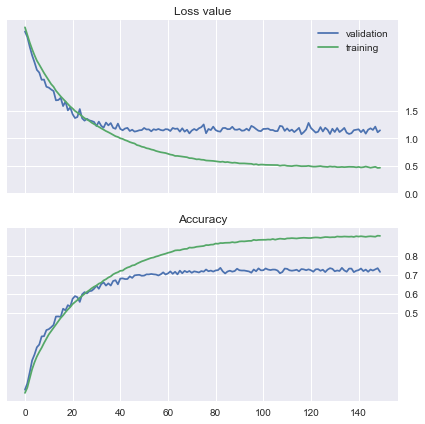

In [13]:
records     = pd.read_csv(folderpath+filename+modelname +'.csv')
plt.figure()
plt.subplot(211)
plt.plot(records['val_loss'], label="validation")
plt.plot(records['loss'],label="training")
plt.yticks([0.00,0.50,1.00,1.50])
plt.title('Loss value',fontsize=12)

ax          = plt.gca()
ax.set_xticklabels([])

plt.subplot(212)
plt.plot(records['val_accuracy'],label="validation")
plt.plot(records['accuracy'],label="training")
plt.yticks([0.5,0.6,0.7,0.8])
plt.title('Accuracy',fontsize=12)
ax.legend()
plt.show()

## **13. Save the model plot**
---

In [14]:
plotpath  = folderpath+filename+modelname+'_plot.png'
plot_model(model, 
           to_file=plotpath, 
           show_shapes=True, 
           show_layer_names=False,
           rankdir='TB')

print("Path to plot:", plotpath)

Path to plot: 202209251427cifar100_plot.png


In [ ]:
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################
##############################################################################################################################

In [56]:
model_name = "202209251427cifar100"
model_file = model_name + ".hdf5"

image_height = 32
image_width = 32

labelname = ['aquatic mammals',
'fish',
'flowers',
'food containers',
'fruit and vegetables',
'household electrical devices',
'household furniture',
'insects',
'large carnivores',
'large man-made outdoor things',
'large natural outdoor scenes',
'large omnivores and herbivores',
'medium-sized mammals',
'non-insect invertebrates',
'people',
'reptiles',
'small mammals',
'trees',
'vehicles 1',
'vehicles 2'
]

def predict_new_image(image):
    image_name = image
    
    image = tf.keras.utils.load_img(image, target_size = None, keep_aspect_ratio = True)
    
    image_array = tf.keras.utils.img_to_array(image)
    image_array = tf.keras.preprocessing.image.smart_resize(image_array, size = (image_height, image_width))
    image_array = tf.expand_dims(image_array, 0)
    image_array = image_array / 255.0
    
    saved_model = load_model(model_file)
    
    predictions = saved_model.predict(image_array)
    score = tf.nn.softmax(predictions[0])
    
    # plt.imshow()
    # plt.show()
    
    print(image_name, 
        " most likely belongs to {} with a {:.2f} percent confidence."
        .format(labelname[np.argmax(score)], 100 * np.max(score))
    )

In [59]:
print(model_file)

predict_new_image("validate/jeremy.jpg")
predict_new_image("validate/tree.jpg")
predict_new_image("validate/fish.jpg")
predict_new_image("validate/cockroach.jpg")
predict_new_image("validate/starfish.jpg")
predict_new_image("validate/whale.jpg")
predict_new_image("validate/car.jpg")
predict_new_image("validate/seal.jpg")
predict_new_image("validate/beaver.jpg")

202209251427cifar100.hdf5
1/1 [==============================] - 0s 96ms/step
validate/jeremy.jpg  most likely belongs to people with a 12.52 percent confidence.
1/1 [==============================] - 0s 99ms/step
validate/tree.jpg  most likely belongs to trees with a 12.52 percent confidence.
1/1 [==============================] - 0s 103ms/step
validate/fish.jpg  most likely belongs to fish with a 11.56 percent confidence.
1/1 [==============================] - 0s 98ms/step
validate/cockroach.jpg  most likely belongs to insects with a 12.50 percent confidence.
1/1 [==============================] - 0s 101ms/step
validate/starfish.jpg  most likely belongs to non-insect invertebrates with a 12.05 percent confidence.
1/1 [==============================] - 0s 94ms/step
validate/whale.jpg  most likely belongs to fish with a 11.42 percent confidence.
1/1 [==============================] - 0s 83ms/step
validate/car.jpg  most likely belongs to vehicles 1 with a 12.52 percent confidence.
1/1 [